# Overview

The [2015 Tree Census](https://catalog.data.gov/dataset/2015-street-tree-census-tree-data) dataset for New York City is collected by volunteers and staff members from [NYC Parks & Rec](https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh). The goal here is to look for and fix any duplicates, outliers, and extraneous columns and rows. Once the data is cleaned, we can create visualizations and build machine learning models.

In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

In [2]:
# import data
data = pd.read_csv('2015-tree-census.csv')

tree = data.copy() # save a copy

In [3]:
tree.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [4]:
tree.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

More information on what each column name stands for:

<table>
<tr>
<th>Column Name</th>
<th>Description</th>
<th>Data Type</th>
</tr>

<tr>
<td>tree_id</td>
<td>Unique identification number for each tree point.</td>
<td>Number</td>
</tr>

<tr>
<td>block_id</td>
<td>Identifier linking each tree to the block in the blockface table/shapefile that it is mapped on.</td>
<td>Number</td>
</tr>

<tr>
<td>created_at</td>
<td>The date tree points were collected in the census software.</td>
<td>Date & Time</td>
</tr>

<tr>
<td>tree_dbh</td>	
<td>Diameter of the tree, measured at approximately 54" / 137cm above the ground. Data was collected for both living and dead trees; for stumps, use stump_diam</td>
<td>Number</td>
</tr>

<tr>
<td>stump_diam</td>
<td>Diameter of stump measured through the center, rounded to the nearest inch.</td>
<td>Number</td>
</tr>

<tr>
<td>curb_loc</td>
<td>Location of tree bed in relationship to the curb; trees are either along the curb (OnCurb) or offset from the curb (OffsetFromCurb)</td>
<td>Plain Text</td>
</tr>

<tr>
<td>status</td>
<td>Indicates whether the tree is alive, standing dead, or a stump.</td>
<td>Plain Text</td>
</tr>

<tr>
<td>health</td>
<td>Indicates the user's perception of tree health.</td>
<td>Plain Text</td>
</tr>

<tr>
<td>spc_latin</td>
<td>Scientific name for species, e.g. "Acer rubrum"</td>
<td>Plain Text</td>
</tr>

<tr>
<td>spc_common</td>
<td>Common name for species, e.g. "red maple"</td>
<td>Plain Text</td>
</tr>

<tr>
<td>steward</td>
<td>Indicates the number of unique signs of stewardship observed for this tree. Not recorded for stumps or dead trees.</td>
<td>Plain Text</td>
</tr>

<tr>
<td>guards</td>
<td>Indicates whether a guard is present, and if the user felt it was a helpful or harmful guard. Not recorded for dead trees and stumps.</td>
<td>Plain Text</td>
</tr>

<tr>
<td>sidewalk</td>
<td>Indicates whether one of the sidewalk flags immediately adjacent to the tree was damaged, cracked, or lifted. Not recorded for dead trees and stumps.</td>
<td>Plain Text</td>
</tr>

<tr>
<td>user_type</td>
<td>This field describes the category of user who collected this tree point's data.</td>
<td>Plain Text</td>
</tr>

<tr>
<td>problems</td>
<td></td>
<td>Plain Text</td>
</tr>

<tr>
<td>root_stone</td>
<td>Indicates the presence of a root problem caused by paving stones in tree bed</td>
<td>Plain Text</td>
</tr>

<tr>
<td>root_grate</td>
<td>Indicates the presence of a root problem caused by metal grates in tree bed</td>
<td>Plain Text</td>
</tr>

<tr>
<td>root_other</td>
<td>Indicates the presence of other root problems</td>
<td>Plain Text</td>
</tr>

<tr>
<td>trunk_wire</td>
<td>Indicates the presence of a trunk problem caused by wires or rope wrapped around the trunk</td>
<td>Plain Text</td>
</tr>

<tr>
<td>trnk_light</td>
<td>Indicates the presence of a trunk problem caused by lighting installed on the tree</td>
<td>Plain Text</td>
</tr>

<tr>
<td>trnk_other</td>
<td>Indicates the presence of other trunk problems</td>
<td>Plain Text</td>
</tr>

<tr>
<td>brch_light</td>
<td>Indicates the presence of a branch problem caused by lights (usually string lights) or wires in the branches</td>
<td>Plain Text</td>
</tr>

<tr>
<td>brch_shoe</td>
<td>Indicates the presence of a branch problem caused by sneakers in the branches</td>
<td>Plain Text</td>
</tr>

<tr>
<td>brch_other</td>
<td>Indicates the presence of other branch problems</td>
<td>Plain Text</td>
</tr>

<tr>
<td>address</td>
<td>Nearest estimated address to tree</td>
<td>Plain Text</td>
</tr>

<tr>
<td>postcode</td>
<td>Five-digit zipcode in which tree is located</td>
<td>Number</td>
</tr>

<tr>
<td>zip_city</td>
<td>City as derived from zipcode. This is often (but not always) the same as borough.</td>
<td>Plain Text</td>
</tr>

<tr>
<td>community board</td>
<td>Community board in which tree point is located</td>
<td>Number</td>
</tr>

<tr>
<td>borocode</td>
<td>Code for borough in which tree point is located: 1 (Manhattan), 2 (Bronx), 3 (Brooklyn), 4 (Queens), 5 (Staten Island)</td>
<td>Number</td>
</tr>

<tr>
<td>borough</td>
<td>Name of borough in which tree point is located</td>
<td>Plain Text</td>
</tr>

<tr>
<td>cncldist</td>
<td>Council district in which tree point is located</td>
<td>Number</td>
</tr>

<tr>
<td>st_assem</td>
<td>State Assembly District in which tree point is located</td>
<td>Number</td>
</tr>

<tr>
<td>st_senate</td>
<td>State Senate District in which tree point is located</td>
<td>Number</td>
</tr>

<tr>
<td>nta</td>
<td>This is the NTA Code corresponding to the neighborhood tabulation area from the 2010 US Census that the tree point falls into.</td>
<td>Plain Text</td>
</tr>

<tr>
<td>nta_name</td>
<td>This is the NTA name corresponding to the neighborhood tabulation area from the 2010 US Census that the tree point falls into.</td>
<td>Plain Text</td>
</tr>

<tr>
<td>boro_ct</td>
<td>This is the boro_ct identifyer for the census tract that the tree point falls into.</td>
<td>Number</td>
</tr>

<tr>
<td>state</td>
<td>All features given value 'New York'</td>
<td>Plain Text</td>
</tr>

<tr>
<td>latitude</td>
<td>Latitude of point, in decimal degrees</td>
<td>Number</td>
</tr>

<tr>
<td>longitude</td>
<td>Longitude of point, in decimal degrees</td>
<td>Number</td>
</tr>

<tr>
<td>x_sp</td>
<td>X coordinate, in state plane. Units are feet.</td>
<td>Number</td>
</tr>

<tr>
<td>y_sp</td>
<td>Y coordinate, in state plane. Units are feet</td>
<td>Number</td>
</tr>

<tr>
<td>council district</td>
<td></td>
<td>Number</td>
</tr>

<tr>
<td>census tract</td>	
<td></td>
<td>Number</td>
</tr>

<tr>
<td>bin</td>
<td></td>
<td>Number</td>
</tr>

<tr>
<td>bbl</td>
<td></td>
<td>Number</td>
</tr>
</table>

## remove any duplicates

In [5]:
tree = tree.drop_duplicates()

tree.shape # no duplicates, no problem!

(683788, 45)

## drop irrelevant columns

In [6]:
# columns to keep
cols_keep = ['tree_id', 'tree_dbh', 'stump_diam', 'curb_loc', 'status', 'health', 'spc_common', 
             'steward', 'guards', 'sidewalk', 'problems', 'root_stone', 'root_grate', 'root_other', 
             'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 'brch_other', 
             'borough', 'longitude', 'latitude']

tree = tree[cols_keep]

Our goal is to analyze the variables that determine tree health, so the following columns can be dropped: block_id, created_at, user_type, address, postcode, zip_city, community board, borocode, cncldist, st_assem, st_senate, nta, nta_name, boro_ct, state, x_sp, y_sp, council district, census tract, bin, and bbl. These columns contain various types of location data, which we already have in borough and latitude and longitude.

In [7]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683788 entries, 0 to 683787
Data columns (total 23 columns):
tree_id       683788 non-null int64
tree_dbh      683788 non-null int64
stump_diam    683788 non-null int64
curb_loc      683788 non-null object
status        683788 non-null object
health        652172 non-null object
spc_common    652169 non-null object
steward       652173 non-null object
guards        652172 non-null object
sidewalk      652172 non-null object
problems      652124 non-null object
root_stone    683788 non-null object
root_grate    683788 non-null object
root_other    683788 non-null object
trunk_wire    683788 non-null object
trnk_light    683788 non-null object
trnk_other    683788 non-null object
brch_light    683788 non-null object
brch_shoe     683788 non-null object
brch_other    683788 non-null object
borough       683788 non-null object
longitude     683788 non-null float64
latitude      683788 non-null float64
dtypes: float64(2), int64(3), object(18

## addressing missing data

In [8]:
tree.isnull().sum() # six columns contain missing data

tree_id           0
tree_dbh          0
stump_diam        0
curb_loc          0
status            0
health        31616
spc_common    31619
steward       31615
guards        31616
sidewalk      31616
problems      31664
root_stone        0
root_grate        0
root_other        0
trunk_wire        0
trnk_light        0
trnk_other        0
brch_light        0
brch_shoe         0
brch_other        0
borough           0
longitude         0
latitude          0
dtype: int64

Six columns are missing data. Perhaps it is because the tree is listed as Stump or Dead under status, so the health field is left blank.

In [9]:
# find trees by status
tree.status.value_counts(dropna=False)

Alive    652173
Stump     17654
Dead      13961
Name: status, dtype: int64

In [10]:
# compare status numbers to health numbers - Dead and Stump is roughly equal to NaN
tree.health.value_counts(dropna=False)

Good    528850
Fair     96504
NaN      31616
Poor     26818
Name: health, dtype: int64

Since 31,616 rows lack health data and 31,615 rows are classified as Stump or Dead, they are likely all the same rows. We can remove them from our dataset since we are focused on living trees.

In [11]:
# any trees that are alive but lack a health status? - Yep, one tree
tree[(tree.health.isnull()) & (tree.status == 'Alive')]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_common,steward,guards,sidewalk,...,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,borough,longitude,latitude
32864,245041,16,0,OnCurb,Alive,NaN,green ash,None,None,Damage,...,No,No,No,No,No,No,No,Staten Island,-74.216412,40.548597


In [12]:
# drop row
tree.drop(tree.index[32864], inplace=True)

Due to the robust nature of the dataset, we can remove rows without disrupting the results and remaining data but will do so with caution.

In [13]:
# remove rows without health statuses
tree = tree[pd.notnull(tree['health'])]

In [14]:
tree.shape

(652172, 23)

In [15]:
tree.isnull().sum()

tree_id        0
tree_dbh       0
stump_diam     0
curb_loc       0
status         0
health         0
spc_common     5
steward        0
guards         1
sidewalk       1
problems      49
root_stone     0
root_grate     0
root_other     0
trunk_wire     0
trnk_light     0
trnk_other     0
brch_light     0
brch_shoe      0
brch_other     0
borough        0
longitude      0
latitude       0
dtype: int64

The 'stump_diam' / stump diameter and 'status' columns can be removed since we are only interested in working with trees that are alive.

In [16]:
# removing the column 'stump_diam' since all trees that are 'Alive' have a diameter of 0
tree.drop(columns='stump_diam', inplace=True)

In [17]:
# remove the 'status' column too since all trees are 'Alive'
tree.drop(columns='status', inplace=True)

In [18]:
# check for null values again
tree.isnull().sum()

tree_id        0
tree_dbh       0
curb_loc       0
health         0
spc_common     5
steward        0
guards         1
sidewalk       1
problems      49
root_stone     0
root_grate     0
root_other     0
trunk_wire     0
trnk_light     0
trnk_other     0
brch_light     0
brch_shoe      0
brch_other     0
borough        0
longitude      0
latitude       0
dtype: int64

Now, the majority of columns no longer contain missing data. For the remaining rows with missing data, we are going to remove them from the dataset since it is impossible to figure out the type, guardship, sidewalk, and problems of a tree from the data. Once again, we are working with a large dataset so removing these rows will not impact our data in a major way.

In [19]:
# drop rows where data is missing
tree = tree.dropna()

# final check for missing values 
tree.isnull().sum()

tree_id       0
tree_dbh      0
curb_loc      0
health        0
spc_common    0
steward       0
guards        0
sidewalk      0
problems      0
root_stone    0
root_grate    0
root_other    0
trunk_wire    0
trnk_light    0
trnk_other    0
brch_light    0
brch_shoe     0
brch_other    0
borough       0
longitude     0
latitude      0
dtype: int64

In [20]:
tree.shape

(652118, 21)

In [21]:
tree.head()

,tree_id,tree_dbh,curb_loc,health,spc_common,steward,guards,sidewalk,problems,root_stone,...,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,borough,longitude,latitude
0,180683,3,OnCurb,Fair,red maple,None,None,NoDamage,None,No,...,No,No,No,No,No,No,No,Queens,-73.844215,40.723092
1,200540,21,OnCurb,Fair,pin oak,None,None,Damage,Stones,Yes,...,No,No,No,No,No,No,No,Queens,-73.818679,40.794111
2,204026,3,OnCurb,Good,honeylocust,1or2,None,Damage,None,No,...,No,No,No,No,No,No,No,Brooklyn,-73.936608,40.717581
3,204337,10,OnCurb,Good,honeylocust,None,None,Damage,Stones,Yes,...,No,No,No,No,No,No,No,Brooklyn,-73.934456,40.713537
4,189565,21,OnCurb,Good,American linden,None,None,Damage,Stones,Yes,...,No,No,No,No,No,No,No,Brooklyn,-73.975979,40.666778


## Analyzing the Distribution of Tree Diameters

The tree_dbh column contains the diameter of the tree in inches, 'measured at approximately 54" / 137 cm above the ground.' For more information, visit the [NYC Street Map](https://tree-map.nycgovparks.org/tree-map).

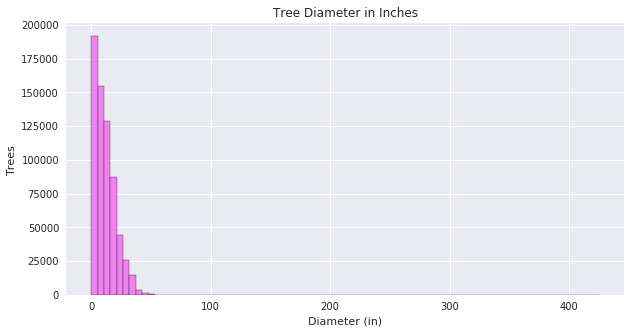

In [22]:
# distribution plot
plt.figure(figsize=(10, 5))

tree.tree_dbh.plot(kind='hist', bins=80, color='violet', edgecolor='black')
plt.title('Tree Diameter in Inches')
plt.xlabel('Diameter (in)')
plt.ylabel('Trees')
plt.show()

In [23]:
# view stats
tree['tree_dbh'].describe()

count    652118.000000
mean         11.709684
std           8.634257
min           0.000000
25%           5.000000
50%          10.000000
75%          16.000000
max         425.000000
Name: tree_dbh, dtype: float64

Observe that the numbers greatly skew to the right. Taking a closer look, we see that the maximum diameter is 425 in, or 35.42 feet, which is extreme for trees grown in NYC. The minimum value is 0, which is also not possible if there is a tree planted that is alive and healthy.

Before looking into the larger values, let's remove the trees with 0 in as their diameter.

In [24]:
# number of rows that have 0 as the diameteer
tree[tree.tree_dbh == 0].shape

(222, 21)

In [25]:
# remove those rows
tree = tree[tree.tree_dbh != 0]

In [26]:
# updated stats
tree.tree_dbh.describe()

count    651896.000000
mean         11.713672
std           8.633022
min           1.000000
25%           5.000000
50%          10.000000
75%          16.000000
max         425.000000
Name: tree_dbh, dtype: float64

At the 75th percentile, the diameter is just 16 inches. Let's take a look at how many trees have a diameter between 100-425 inches.

In [27]:
tree[tree.tree_dbh > 100].head(10)

,tree_id,tree_dbh,curb_loc,health,spc_common,steward,guards,sidewalk,problems,root_stone,...,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,borough,longitude,latitude
2404,168583,425,OnCurb,Good,swamp white oak,1or2,None,Damage,None,No,...,No,No,No,No,No,No,No,Brooklyn,-73.946936,40.672287
6720,209349,122,OnCurb,Good,pin oak,None,None,Damage,None,No,...,No,No,No,No,No,No,No,Staten Island,-74.115959,40.562379
10070,215075,169,OnCurb,Good,honeylocust,None,None,NoDamage,None,No,...,No,No,No,No,No,No,No,Bronx,-73.847206,40.894886
25839,214532,177,OnCurb,Fair,black locust,1or2,None,NoDamage,None,No,...,No,No,No,No,No,No,No,Queens,-73.762585,40.766343
29952,214534,282,OnCurb,Good,London planetree,1or2,None,NoDamage,None,No,...,No,No,No,No,No,No,No,Queens,-73.762538,40.766147
40844,220376,110,OnCurb,Poor,Norway maple,None,None,Damage,"Stones,RootOther,BranchLights,BranchOther",Yes,...,Yes,No,No,No,Yes,No,Yes,Queens,-73.915831,40.709002
79155,287234,234,OnCurb,Good,Callery pear,None,None,NoDamage,None,No,...,No,No,No,No,No,No,No,Staten Island,-74.104353,40.632165
81735,244676,120,OnCurb,Good,Callery pear,None,None,NoDamage,BranchLights,No,...,No,No,No,No,Yes,No,No,Queens,-73.760941,40.665536
83538,278078,255,OnCurb,Good,London planetree,None,None,Damage,"Stones,WiresRope,BranchLights",Yes,...,No,Yes,No,No,Yes,No,No,Staten Island,-74.104362,40.627198
100285,304388,228,OnCurb,Fair,Callery pear,None,None,NoDamage,BranchOther,No,...,No,No,No,No,No,No,Yes,Manhattan,-73.948116,40.802178


In [28]:
tree[tree.tree_dbh > 100].shape

(67, 21)

Only 67 trees have a diameter over 100 inches. We can remove them from our dataset since they make up less than 0.1% of the population.

In [29]:
# remove trees
tree = tree[tree.tree_dbh < 101]

# updated stats
tree.tree_dbh.describe()

count    651829.000000
mean         11.696164
std           8.428281
min           1.000000
25%           5.000000
50%          10.000000
75%          16.000000
max         100.000000
Name: tree_dbh, dtype: float64

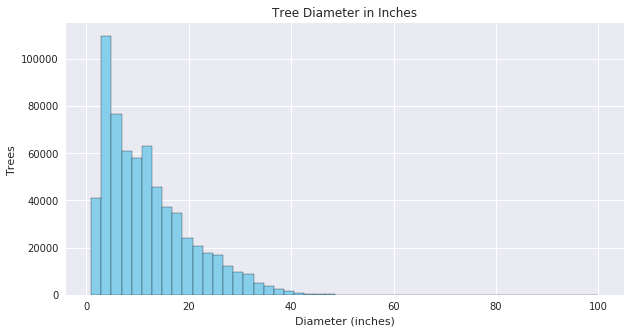

In [30]:
# updated distributions
plt.figure(figsize=(10, 5))

tree.tree_dbh.plot(kind='hist', bins=50, color='skyblue', edgecolor='k')
plt.title('Tree Diameter in Inches')
plt.xlabel('Diameter (inches)')
plt.ylabel('Trees')
plt.show()

The data is still skewed to the right. It appears that the majority of trees have a diameter of less than 60 in.

Let's take a look at how many trees have a diameter between 50 and 100 inches.

In [31]:
tree[tree.tree_dbh > 50].shape

(294, 21)

A very small number of trees, less than 0.1% of the population, have a diameter between 50 and 100 inches, so it's safe to remove them from the dataset without disturbing the rest of the data.

In [32]:
tree = tree[tree.tree_dbh < 51]

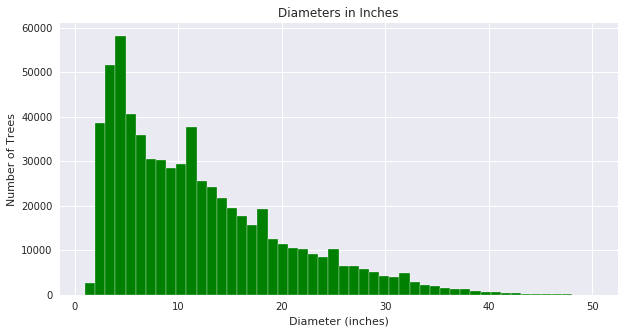

In [33]:
# updated plot
plt.figure(figsize=(10, 5))

tree.tree_dbh.plot(kind='hist', color='green', edgecolor='white', bins=50)
plt.xlabel('Diameter (inches)')
plt.ylabel('Number of Trees')
plt.title('Diameters in Inches')
plt.show()

In [34]:
# updated stats
tree.tree_dbh.describe()

count    651535.000000
mean         11.674665
std           8.366295
min           1.000000
25%           5.000000
50%          10.000000
75%          16.000000
max          50.000000
Name: tree_dbh, dtype: float64

Now that we have a clean dataset, we can proceed to analyze and visualization our data.

In [35]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651535 entries, 0 to 683787
Data columns (total 21 columns):
tree_id       651535 non-null int64
tree_dbh      651535 non-null int64
curb_loc      651535 non-null object
health        651535 non-null object
spc_common    651535 non-null object
steward       651535 non-null object
guards        651535 non-null object
sidewalk      651535 non-null object
problems      651535 non-null object
root_stone    651535 non-null object
root_grate    651535 non-null object
root_other    651535 non-null object
trunk_wire    651535 non-null object
trnk_light    651535 non-null object
trnk_other    651535 non-null object
brch_light    651535 non-null object
brch_shoe     651535 non-null object
brch_other    651535 non-null object
borough       651535 non-null object
longitude     651535 non-null float64
latitude      651535 non-null float64
dtypes: float64(2), int64(2), object(17)
memory usage: 109.4+ MB


In [36]:
# save cleaned dataset to new file
# tree.to_csv('tree_census_cleaned.csv')